## Terrain Classification using Convolutional Neural Networks
This notebook demonstrates how to build and train a Convolutional Neural Network (CNN) for classifying terrain images into four categories.

### Importing Libraries

In [1]:
from google.colab import drive
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


### Mounting and Extracting Data

In [2]:
drive.mount('/content/drive')

zip_file_path = '/content/drive/My Drive/data.zip'
unzip_dir = '/content/data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)


Mounted at /content/drive


### configuring paths

In [3]:
# Set paths to the data directories
data_dir = os.path.join(unzip_dir, 'Data Main')
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

### Data Preprocessing

Uses ImageDataGenerator to preprocess and augment training, validation, and test datasets.

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2, rotation_range=15)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=['Grassy', 'Marshy', 'Rocky', 'Sandy']
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=['Grassy', 'Marshy', 'Rocky', 'Sandy']
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    classes=['Grassy', 'Marshy', 'Rocky', 'Sandy']
)

Found 31571 images belonging to 4 classes.
Found 6765 images belonging to 4 classes.
Found 6769 images belonging to 4 classes.


### Building the model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Compiling..


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model


In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


987/987 ━━━━━━━━━━━━━━━━━━━━ 320s 315ms/step - accuracy: 0.7557 - loss: 0.6020 - val_accuracy: 0.8718 - val_loss: 0.3289
Epoch 2/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 289s 291ms/step - accuracy: 0.8729 - loss: 0.3387 - val_accuracy: 0.9013 - val_loss: 0.2603
Epoch 3/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 317s 286ms/step - accuracy: 0.9019 - loss: 0.2725 - val_accuracy: 0.9364 - val_loss: 0.1683
Epoch 4/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 285s 287ms/step - accuracy: 0.9191 - loss: 0.2307 - val_accuracy: 0.9500 - val_loss: 0.1401
Epoch 5/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 285s 286ms/step - accuracy: 0.9341 - loss: 0.1904 - val_accuracy: 0.9565 - val_loss: 0.1286
Epoch 6/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 302s 304ms/step - accuracy: 0.9382 - loss: 0.1755 - val_accuracy: 0.9602 - val_loss: 0.1092
Epoch 7/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 280s 282ms/step - accuracy: 0.9439 - loss: 0.1628 - val_accuracy: 0.9559 - val_loss: 0.1218
Epoch 8/20
987/987 ━━━━━━━━━━━━━━━━━━━━ 278s 280ms/step - accuracy: 0.9453 - loss: 0.15

### Training history printing functions ->

Model saved successfully to Google Drive


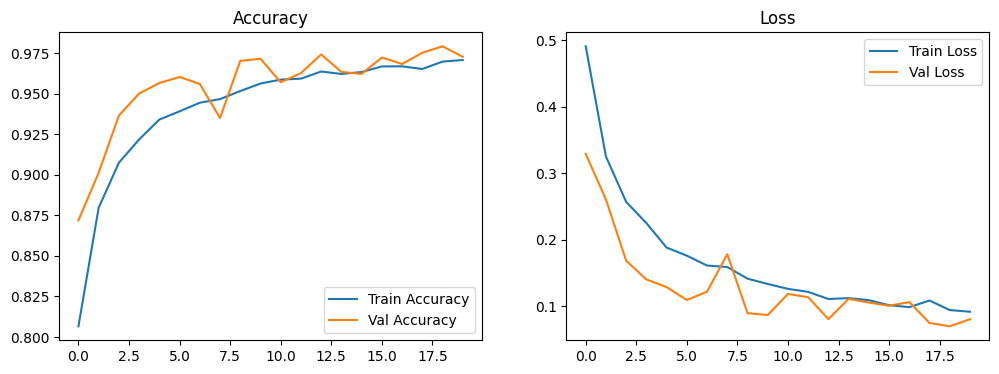

In [8]:
# Specify the path where you want to save the model
model_filename = '/content/drive/My Drive/trained_model.h5'

# Save the model
model.save(model_filename)

print("Model saved successfully to Google Drive")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


### Evaluating the model on test data

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

212/212 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.9805 - loss: 0.0654
Test Accuracy: 97.86%


## Classification Reports and Confusion matrix

In [10]:
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

print("\nConfusion Matrix:\n")
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

212/212 ━━━━━━━━━━━━━━━━━━━━ 31s 142ms/step

Classification Report:

              precision    recall  f1-score   support

      Grassy       0.99      0.99      0.99      1824
      Marshy       0.98      0.95      0.97      1657
       Rocky       0.96      0.98      0.97      1644
       Sandy       0.99      1.00      0.99      1644

    accuracy                           0.98      6769
   macro avg       0.98      0.98      0.98      6769
weighted avg       0.98      0.98      0.98      6769


Confusion Matrix:

[[1803   17    4    0]
 [   6 1573   64   14]
 [  14   13 1610    7]
 [   0    0    6 1638]]


## visualising Confusion matrix

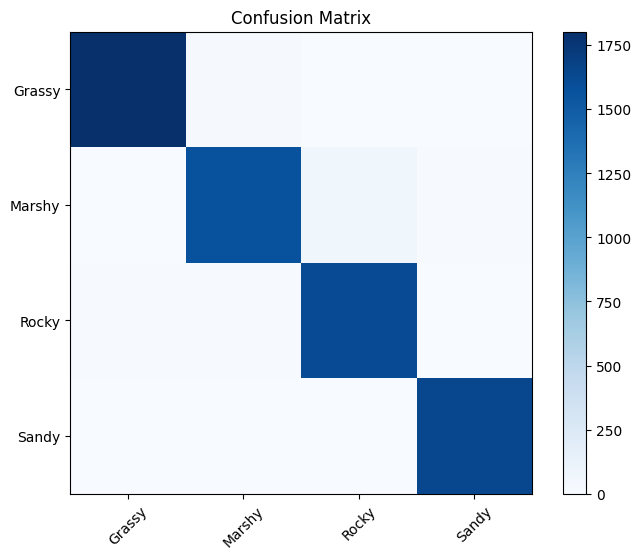

In [11]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.title("Confusion Matrix")
plt.show()
